In [ ]:
from IPython.display import Audio
import soundfile as sf
import numpy as np

In [ ]:
file_path = '/nas/home/fferreri/baseline_codes/Dataset4_05_n20/mic_dev/mic/fold5_room1_mix025.wav'

# Carica l'audio
audio_data, sample_rate = sf.read(file_path)

# Controlla le dimensioni del file
print(f"Forma del file audio: {audio_data.shape}")  # (n_samples, n_channels)

# Seleziona il canale desiderato (ad esempio il primo canale)
channel = 0
single_channel_audio = audio_data[:, channel]

# Riproduci il primo canale
Audio(single_channel_audio, rate=sample_rate)


[[ 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5
   2.5  2.5  2.5  2.5  2.5  2.5]
 [ 1.  10.  10.1 10.2 10.3 10.5 10.9 11.  11.3 11.5 11.7 11.8 12.  12.6
  12.7 13.  13.4 13.9 15.1 19. ]
 [ 1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2
   1.2  1.2  1.2  1.2  1.2  1.2]]


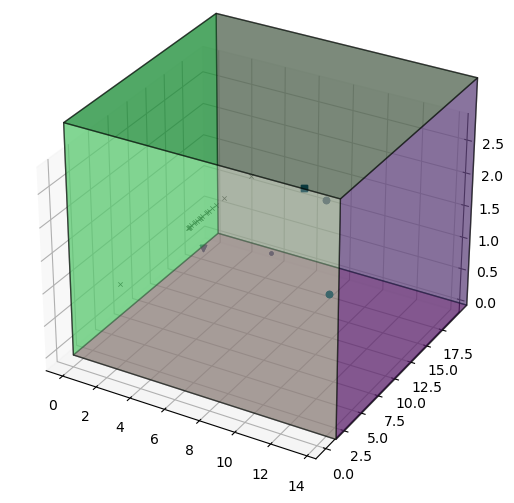

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import wavfile

import spatialscaper as ss
import pyroomacoustics as pra

# The desired reverberation time and dimensions of the room
rt60_tgt = 0.6  # seconds
room_dim = [15, 20, 3.5]  # meters


# the sampling frequency should match that of the room
fs = 24000


# We invert Sabine's formula to obtain the parameters for the ISM simulator
e_absorption, max_order = pra.inverse_sabine(rt60_tgt, room_dim)

pra.constants.set("octave_bands_keep_dc", True)

room = pra.ShoeBox(
      room_dim,
      fs=fs,
      materials=pra.Material(e_absorption),
      max_order=max_order,
      use_rand_ism=True,
      air_absorption=True,
  )

# place the source in the room
room.add_source([13.5, 2.73, 1.76], delay=0.5)
room.add_source([10.5, 6.73, 2.7], delay=0.5)
room.add_source([3.5, 9.73, 1.0], delay=0.5)
room.add_source([5.5, 14.73, 0.6], delay=0.5)
room.add_source([7.5, 17.73, 1.3], delay=0.5)


'''n_mics = 32
y_start = 3  # starting point on the y-axes
y_step = 0.5  # Distance between microphones (0.5 m)
z_fixed = 1.2
x_fixed = 2.5

y_positions = y_start + np.arange(n_mics) * y_step
x_positions = np.full(n_mics, x_fixed)
z_positions = np.full(n_mics, z_fixed)

mic_locs = np.vstack([x_positions, y_positions, z_positions])'''
z_fixed = 1.2
x_fixed = 2.5

y_positions = np.array([10, 10.1, 10.2, 10.3, 10.5, 10.9, 11, 11.3, 11.5, 11.7, 11.8, 12, 12.6, 12.7, 13, 13.4, 13.9, 15.1])
x_positions = np.full(len(y_positions), x_fixed)
z_positions = np.full(len(y_positions), z_fixed)

mic_locs = np.vstack([x_positions, y_positions, z_positions])
'''mic_locs = np.c_[
        [1.5, 8.5, 1.2],  # mic 1
        [7.5, 1.5, 1.2],  # mic 2
        [7.5, 18.5, 1.2],  # mic 3
        [13.5, 8.5, 1.2],  # mic 4
    ]'''

print(mic_locs)

# finally place the array in the room
room.add_microphone_array(mic_locs)
fig, ax = room.plot()
# Run the simulation (this will also build the RIR automatically)
#room.compute_rir()

